异常检测实战task：
1、基于 anomaly_data.csv数据，可视化数据分布情况、及其对应高斯分布的概率密度函数
2、建立模型，实现异常数据点预测
3、可视化异常检测处理结果
4、修改概率分布阈值EllipticEnvelope(contamination=0.1)中的contamination，查看阈值改变对结果的影响

In [2]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


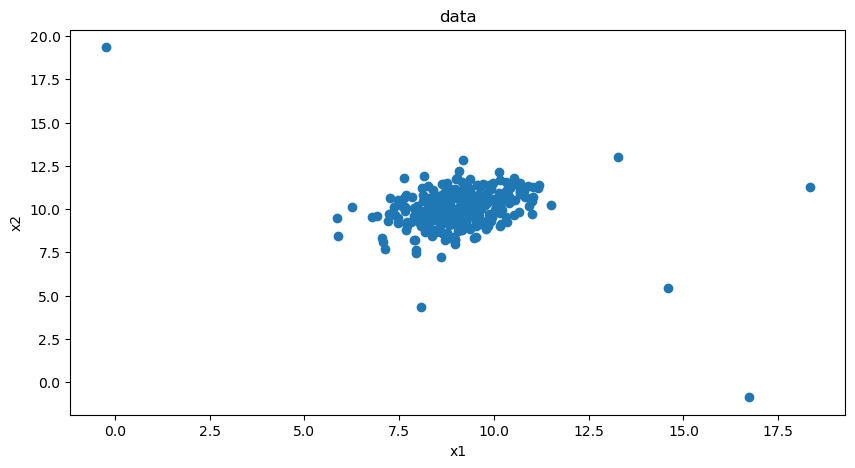

In [3]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(10,5))
plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
#define x1 and x2
x1 = data.loc[:,'x1']
x2 = data.loc[:,'x2']

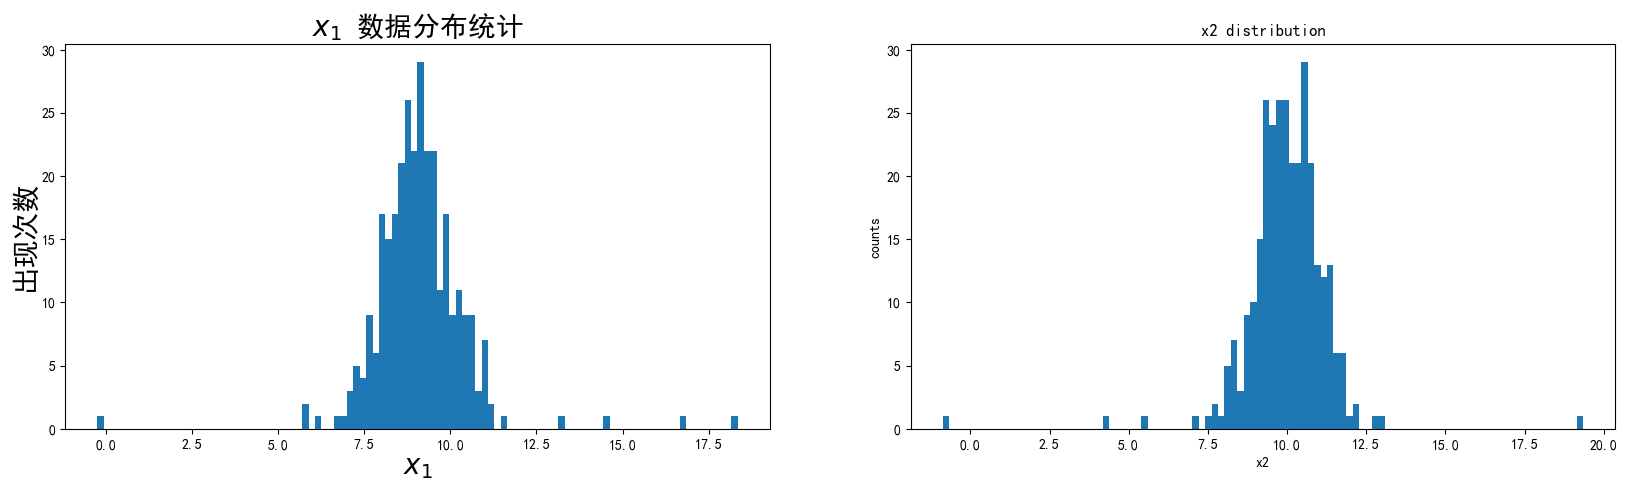

In [8]:

import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
fig2 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x1,bins=100)
plt.title('$x_1$ 数据分布统计',font2)
plt.xlabel('$x_1$',font2)
plt.ylabel('出现次数',font2)
plt.subplot(122)
plt.hist(x2,bins=100)
plt.title('x2 distribution')
plt.xlabel('x2')
plt.ylabel('counts')
plt.show()

In [7]:
#calculate the mean and sigma of x1 and x2
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print(x1_mean,x1_sigma,x2_mean,x2_sigma)

9.112225783931596 1.3559573758220915 9.997710507954398 1.3097071175386399


In [9]:
#calculate the gaussian distribution p(x)
from scipy.stats import norm
x1_range = np.linspace(0,20,300)
x1_normal = norm.pdf(x1_range,x1_mean,x1_sigma)
x2_range = np.linspace(0,20,300)
x2_normal = norm.pdf(x2_range,x2_mean,x2_sigma)

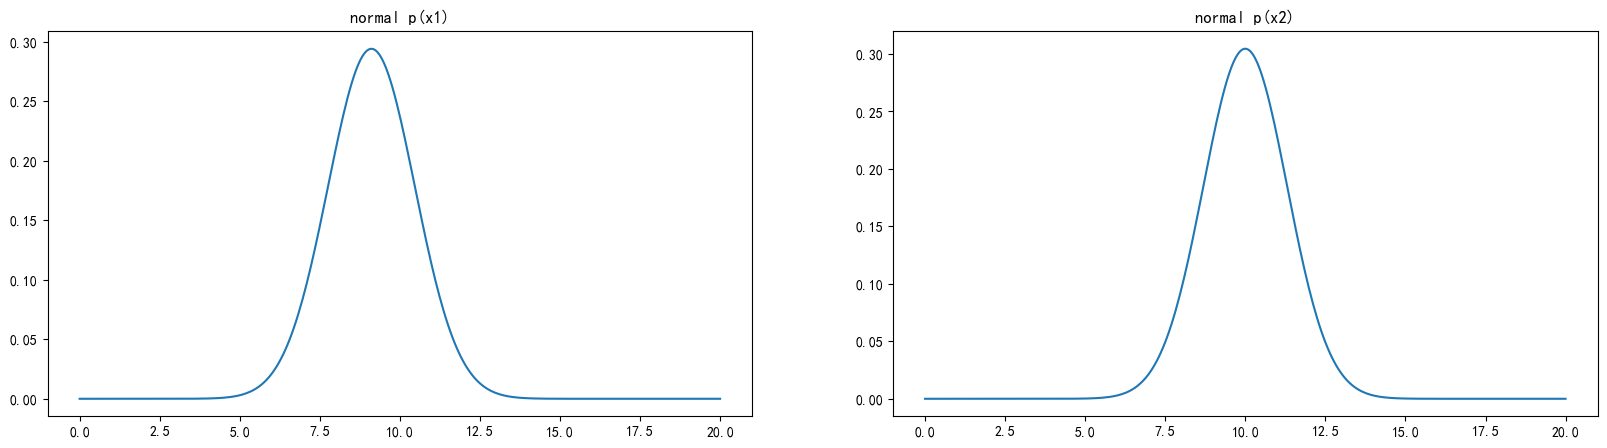

In [10]:
#visualize the p(x)
fig2 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(x1_range,x1_normal)
plt.title('normal p(x1)')
plt.subplot(122)
plt.plot(x2_range,x2_normal)
plt.title('normal p(x2)')
plt.show()

In [11]:
#establish the model and predict
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope()
ad_model.fit(data)

EllipticEnvelope(contamination=0.03)

In [12]:
#make prediction
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))

 1    297
-1     10
dtype: int64


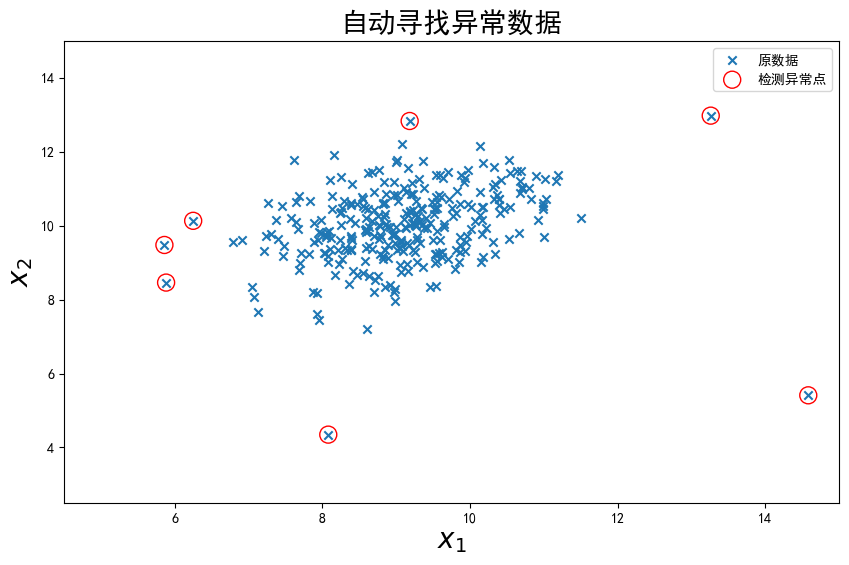

In [13]:
#visualize the result
fig4 = plt.figure(figsize=(10,6))
orginal_data=plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
anomaly_data=plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1],marker='o',facecolor='none',edgecolor='red',s=150)

plt.title('自动寻找异常数据',font2)
plt.xlabel('$x_1$',font2)
plt.ylabel('$x_2$',font2)
plt.legend((orginal_data,anomaly_data),('原数据','检测异常点'))
plt.axis([4.5,15,2.5,15])
plt.show()

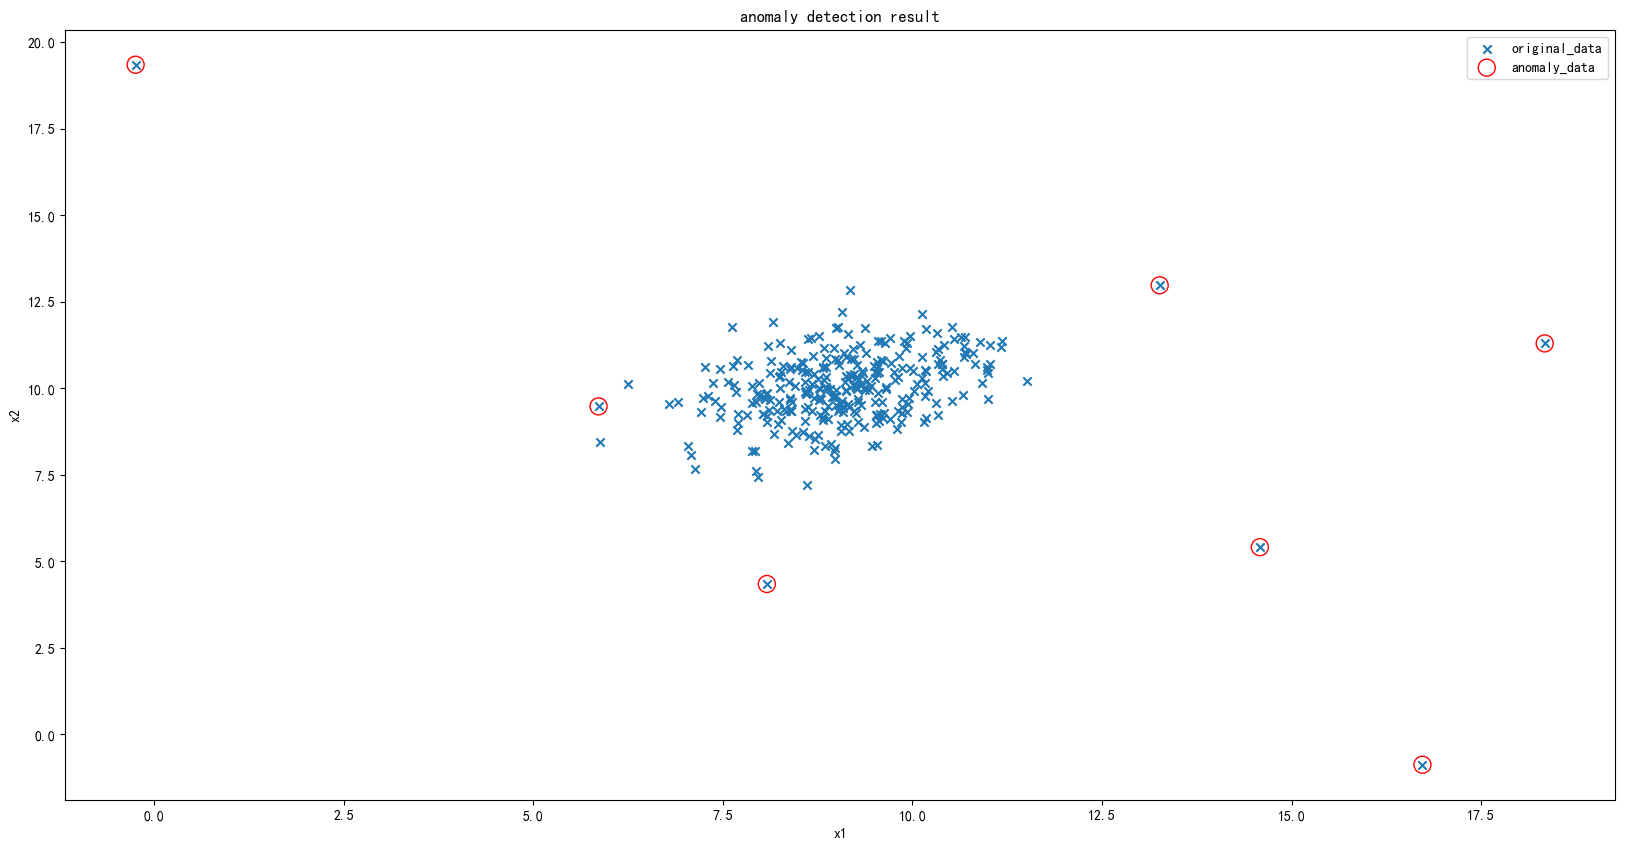

In [14]:
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(data)
y_predict = ad_model.predict(data)
#visualize the result
fig5 = plt.figure(figsize=(20,10))
orginal_data=plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
anomaly_data=plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1],marker='o',facecolor='none',edgecolor='red',s=150)

plt.title('anomaly detection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((orginal_data,anomaly_data),('original_data','anomaly_data'))
plt.show()

异常检测实战summary：
1、通过计算数据各维度对应的高斯分布概率密度函数，可用于寻找到数据中的异常点；
2、通过修改概率密度阈值contamination，可调整异常点检测的灵敏度;
3、核心算法参考链接：https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html?highlight=ellipticenvelope